In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Straight Shot Results

In [2]:
# straight shot results
ss_df = pd.read_csv("datasets/cn_k12_math_problems_ss_command-r-plus-08-2024_500_5.csv")
print(f"Loaded dataframe with {len(ss_df)} rows")
ss_df.head()

Loaded dataframe with 2500 rows


,row_id,problem,ground_truth_solution,solution_idx,candidate_solution,verification_reasoning,verification
0,0,The integer part $a=$______ and the decimal pa...,To solve for the integer part $a$ and the deci...,0,"To solve this problem, we can use the followin...",The final answer from the ground truth solutio...,False
1,0,The integer part $a=$______ and the decimal pa...,To solve for the integer part $a$ and the deci...,1,We can solve this problem as follows:\n\n$\sqr...,The final answer from the ground truth solutio...,False
2,0,The integer part $a=$______ and the decimal pa...,To solve for the integer part $a$ and the deci...,2,We can solve this problem as follows:\n\n- Fir...,The final answer from the ground truth solutio...,False
3,0,The integer part $a=$______ and the decimal pa...,To solve for the integer part $a$ and the deci...,3,We can solve this problem as follows:\n\n- Fir...,The final answer from the ground truth solutio...,False
4,0,The integer part $a=$______ and the decimal pa...,To solve for the integer part $a$ and the deci...,4,We can solve this problem as follows:\n\n- Fir...,The final answer from the ground truth solutio...,False


# After extracting the Solvable problems

In [3]:
# sip results
sip_df = pd.read_csv("datasets/cn_k12_math_problems_sip_command-r-plus-08-2024_191_636.csv")
print(f"Number of unique solvable problems: {sip_df['row_id'].nunique()}")
print(f"Loaded dataframe with {len(sip_df)} rows (incorrect solutions)")
print(f"Average number of incorrect solutions per solvable problem: {len(sip_df) / sip_df['row_id'].nunique():.2f}")
sip_df.head()

Number of unique solvable problems: 191
Loaded dataframe with 636 rows (incorrect solutions)
Average number of incorrect solutions per solvable problem: 3.33


,row_id,problem,ground_truth_solution,solution_idx,candidate_solution,verification_reasoning,verification
0,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False
1,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",1,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False
2,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",4,"We are given the point $(-1, 2)$ on the graph ...",The final answer provided in the ground truth ...,False
3,5,Given that $F$ is the focus of the parabola $x...,Since $F$ is the focus of the parabola $x^{2}=...,1,We can solve this problem using the following ...,The final answer provided in the ground truth ...,False
4,5,Given that $F$ is the focus of the parabola $x...,Since $F$ is the focus of the parabola $x^{2}=...,3,We are given the equation of the parabola as $...,The final answer provided in the ground truth ...,False


# After padding remianing incorrect solutions (3 per problem) and getting prefixes of varying P takes (.1, .3, .5, .7)

In [4]:
prefix_df = pd.read_csv("datasets/cn_k12_math_problems_prefixes_on_policy_command-r-plus-08-2024_191_3_take_0.1_0.3_0.5_0.7.csv")
print(f"Loaded dataframe with {len(prefix_df)} rows (prefixes)")
print(f"Number of unique solvable problems: {prefix_df['row_id'].nunique()}")
print(f"Average number of prefixes per solvable problem: {len(prefix_df) / prefix_df['row_id'].nunique():.2f}")
prefix_df.head()

# Ignore the presence of this "prefix" column; I've removed the code that generates it in generate_prefixes_remainng_on_policy; it's not something to worry about.


Loaded dataframe with 573 rows (prefixes)
Number of unique solvable problems: 191
Average number of prefixes per solvable problem: 3.00


,row_id,problem,ground_truth_solution,solution_idx,candidate_solution,verification_reasoning,verification,prefix,prefix_take_0.1,prefix_take_0.3,prefix_take_0.5,prefix_take_0.7
0,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on..."
1,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",1,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on..."
2,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",2,"We are given the point $(-1, 2)$ on the graph ...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ on the graph ...","We are given the point $(-1, 2)$ on the graph ...","We are given the point $(-1, 2)$ on the graph ...","We are given the point $(-1, 2)$ on the graph ..."
3,5,Given that $F$ is the focus of the parabola $x...,Since $F$ is the focus of the parabola $x^{2}=...,0,We can solve this problem using the following ...,The final answer provided in the ground truth ...,False,NaN,We can solve this problem using the following ...,We can solve this problem using the following ...,We can solve this problem using the following ...,We can solve this problem using the following ...
4,5,Given that $F$ is the focus of the parabola $x...,Since $F$ is the focus of the parabola $x^{2}=...,1,We are given the equation of the parabola as $...,The final answer provided in the ground truth ...,False,NaN,We are given the equation of the parabola as $...,We are given the equation of the parabola as $...,We are given the equation of the parabola as $...,We are given the equation of the parabola as $...


In [5]:
# Pick a problem to examine all prefixes for
problem_id = 1
problem_prefixes = prefix_df[prefix_df['row_id'] == problem_id]

first_row = problem_prefixes.iloc[0]
print(f"\nSolution {first_row['solution_idx']}:")
print(f"\nPrefix take 0.1:\n{first_row['prefix_take_0.1']}")
print(f"\nPrefix take 0.3:\n{first_row['prefix_take_0.3']}")
print(f"\nPrefix take 0.5:\n{first_row['prefix_take_0.5']}")
print(f"\nPrefix take 0.7:\n{first_row['prefix_take_0.7']}")
print("\n" + "="*80)


# print(f"Problem:\n{problem_prefixes['problem'].iloc[0]}\n")
# print(f"Ground truth solution:\n{problem_prefixes['ground_truth_solution'].iloc[0]}\n")

# for idx, row in problem_prefixes.iterrows():
#     print(f"\nSolution {row['solution_idx']}:")
#     print(f"\nPrefix take 0.1:\n{row['prefix_take_0.1']}")
#     print(f"\nPrefix take 0.3:\n{row['prefix_take_0.3']}")
#     print(f"\nPrefix take 0.5:\n{row['prefix_take_0.5']}")
#     print(f"\nPrefix take 0.7:\n{row['prefix_take_0.7']}")
#     print("\n" + "="*80)



Solution 0:

Prefix take 0.1:
We are given the point $(-1, 2)$ which lies on the graph of the inverse proportion function $y = \frac{k}{x}$.

Prefix take 0.3:
We are given the point $(-1, 2)$ which lies on the graph of the inverse proportion function $y = \frac{k}{x}$. We can use this information to find the value of the constant $k$: $$ \begin{align*} 2 & = \frac{k}{-1} \\ -2 & = k \end{align*} $$ So, the equation of the function is $y = \frac{-2}{x}$. Now, let's analyze the statements:

Prefix take 0.5:
We are given the point $(-1, 2)$ which lies on the graph of the inverse proportion function $y = \frac{k}{x}$. We can use this information to find the value of the constant $k$: $$ \begin{align*} 2 & = \frac{k}{-1} \\ -2 & = k \end{align*} $$ So, the equation of the function is $y = \frac{-2}{x}$. Now, let's analyze the statements: A: To check if the graph passes through $(1, 2)$, we plug in $x = 1$ into the equation: $$ \begin{align*} y & = \frac{-2}{1} \\ & = -2 \end{align*} $$ So,

# Completions for each prefix set

In [6]:
# The input/"before"
input_df = pd.read_csv("datasets/cn_k12_math_problems_prefixes_on_policy_command-r-plus-08-2024_191_3_take_0.1_0.3_0.5_0.7.csv")
print(f"Loaded dataframe with {len(input_df)} rows (prefixes)")
input_df.head(12)



Loaded dataframe with 573 rows (prefixes)


,row_id,problem,ground_truth_solution,solution_idx,candidate_solution,verification_reasoning,verification,prefix,prefix_take_0.1,prefix_take_0.3,prefix_take_0.5,prefix_take_0.7
0,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on..."
1,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",1,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on..."
2,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",2,"We are given the point $(-1, 2)$ on the graph ...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ on the graph ...","We are given the point $(-1, 2)$ on the graph ...","We are given the point $(-1, 2)$ on the graph ...","We are given the point $(-1, 2)$ on the graph ..."
3,5,Given that $F$ is the focus of the parabola $x...,Since $F$ is the focus of the parabola $x^{2}=...,0,We can solve this problem using the following ...,The final answer provided in the ground truth ...,False,NaN,We can solve this problem using the following ...,We can solve this problem using the following ...,We can solve this problem using the following ...,We can solve this problem using the following ...
4,5,Given that $F$ is the focus of the parabola $x...,Since $F$ is the focus of the parabola $x^{2}=...,1,We are given the equation of the parabola as $...,The final answer provided in the ground truth ...,False,NaN,We are given the equation of the parabola as $...,We are given the equation of the parabola as $...,We are given the equation of the parabola as $...,We are given the equation of the parabola as $...
5,5,Given that $F$ is the focus of the parabola $x...,Since $F$ is the focus of the parabola $x^{2}=...,2,We are given the equation of the parabola as $...,The final answer provided in the ground truth ...,False,NaN,We are given the equation of the parabola as $...,We are given the equation of the parabola as $...,We are given the equation of the parabola as $...,We are given the equation of the parabola as $...
6,7,The domain of the function $f(x)$ is $\mathbb{...,**Analysis**\n\nThis question examines the use...,0,We are given that $f(x)$ is a function defined...,The final answer provided in the ground truth ...,False,NaN,We are given that $f(x)$ is a function defined...,We are given that $f(x)$ is a function defined...,We are given that $f(x)$ is a function defined...,We are given that $f(x)$ is a function defined...
7,7,The domain of the function $f(x)$ is $\mathbb{...,**Analysis**\n\nThis question examines the use...,1,We are given that $f(x)$ is a function defined...,The final answer provided in the ground truth ...,False,NaN,We are given that $f(x)$ is a function defined...,We are given that $f(x)$ is a function defined...,We are given that $f(x)$ is a function defined...,We are given that $f(x)$ is a function defined...
8,7,The domain of the function $f(x)$ is $\mathbb{...,**Analysis**\n\nThis question examines the use...,2,We are given that $f(4) = -3$ and $f''(x) < 3$...,The final answer from the ground truth solutio...,False,NaN,We are given that $f(4) = -3$ and $f''(x),We are given that $f(4) = -3$ and $f''(x) < 3$...,We are given that $f(4) = -3$ and $f''(x) < 3$...,We are given that $f(4) = -3$ and $f''(x) < 3$...
9,11,"Let set $A = \{5, \log_{2}(a + 3)\}$, a

In [7]:
# We asked to generate 5 solutions for each... Looking at the 0.3 prefix. So it should be the same columns, but with 3 new ones (.3completion, .3verificationreasoning, .3verification)
# The output/"after" completion
output_df = pd.read_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_191_3_5_ON_take_0.3.csv")
print(f"Loaded dataframe with {len(output_df)} rows (completions)")
print(f"There are {output_df['row_id'].nunique()} unique solvable problems in the output dataframe")
print(f"There are {output_df['solution_idx'].nunique()} unique incorrect solutions for every solvable problem in the output dataframe")
print(f"There are {output_df['completion_idx'].nunique()} completions per incorrect solution for every solvable problem in the output dataframe")
print(f"Thus there should be {output_df['solution_idx'].nunique() * output_df['completion_idx'].nunique()} rows for every solvable problem (row_id)")

verification_column = "prefix_take_0.3_completion_verification"

# Calculate average success rate per problem
success_rates = output_df.groupby('row_id')[verification_column].mean()
print(f"\nAverage success rate per problem:")
# print(success_rates)
print(f"\nOverall average success rate across all problems: {success_rates.mean():.2%}")

# Calculate per-problem success rates
per_problem_success = output_df.groupby('row_id')[verification_column].agg(['mean', 'count']).round(3)
# print("\nPer-problem success rates:")
# print(per_problem_success)

# Calculate per-incorrect-solution success rates
per_solution_success = output_df.groupby(['row_id', 'solution_idx'])[verification_column].agg(['mean', 'count']).round(3)
# print("\nPer-incorrect-solution success rates:")
# print(per_solution_success)

# Print summary statistics
print("\nSummary:")
print(f"Average success rate across problems: {per_problem_success['mean'].mean():.1%}")
# print(f"Average success rate across individual incorrect solutions: {per_solution_success['mean'].mean():.1%}")



output_df.head(1)



Loaded dataframe with 2865 rows (completions)
There are 191 unique solvable problems in the output dataframe
There are 3 unique incorrect solutions for every solvable problem in the output dataframe
There are 5 completions per incorrect solution for every solvable problem in the output dataframe
Thus there should be 15 rows for every solvable problem (row_id)

Average success rate per problem:

Overall average success rate across all problems: 24.40%

Summary:
Average success rate across problems: 24.4%


,row_id,problem,ground_truth_solution,solution_idx,candidate_solution,verification_reasoning,verification,prefix,prefix_take_0.1,prefix_take_0.3,prefix_take_0.5,prefix_take_0.7,completion_idx,prefix_take_0.3_completion,prefix_take_0.3_completion_verification_reasoning,prefix_take_0.3_completion_verification
0,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...","We are given the point $(-1, 2)$ which lies on...",0,\nA: To check if the graph passes through the ...,The final answer provided in the ground truth ...,True


# Combining the Three Prefix Sets

In [8]:
# Load all three completion datasets
output_df_03 = pd.read_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_191_3_5_ON_take_0.3.csv")
output_df_05 = pd.read_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_191_3_5_ON_take_0.5.csv")
output_df_07 = pd.read_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_191_3_5_ON_take_0.7.csv")

# Extract just the completion columns from 0.5 dataset
completion_cols_05 = [
    "prefix_take_0.5_completion",
    "prefix_take_0.5_completion_verification_reasoning", 
    "prefix_take_0.5_completion_verification"
]
output_df_05_subset = output_df_05[["row_id", "solution_idx", "completion_idx"] + completion_cols_05]

# Extract just the completion columns from 0.7 dataset  
completion_cols_07 = [
    "prefix_take_0.7_completion",
    "prefix_take_0.7_completion_verification_reasoning",
    "prefix_take_0.7_completion_verification"
]
output_df_07_subset = output_df_07[["row_id", "solution_idx", "completion_idx"] + completion_cols_07]

# Join the datasets
combined_df = output_df_03.merge(
    output_df_05_subset,
    on=["row_id", "solution_idx", "completion_idx"],
    how="left"
).merge(
    output_df_07_subset, 
    on=["row_id", "solution_idx", "completion_idx"],
    how="left"
)

print(f"Combined dataframe has {len(combined_df)} rows")
print(f"There are {combined_df['row_id'].nunique()} unique problems")
print(f"There are {combined_df['solution_idx'].nunique()} unique incorrect solutions per problem")
print(f"There are {combined_df['completion_idx'].nunique()} completions per incorrect solution")

combined_df.head(1)

combined_df.to_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_191_3_5_ON_take_0.3_0.5_0.7_COMBINED.csv")



Combined dataframe has 2865 rows
There are 191 unique problems
There are 3 unique incorrect solutions per problem
There are 5 completions per incorrect solution


In [9]:
# Calculate average recovery rate per problem for each prefix length
recovery_rates = combined_df.groupby('row_id').agg({
    'prefix_take_0.3_completion_verification': 'mean',
    'prefix_take_0.5_completion_verification': 'mean', 
    'prefix_take_0.7_completion_verification': 'mean'
}).rename(columns={
    'prefix_take_0.3_completion_verification': 'recovery_rate_0.3',
    'prefix_take_0.5_completion_verification': 'recovery_rate_0.5',
    'prefix_take_0.7_completion_verification': 'recovery_rate_0.7'
})

n_head = 5
print(f"Average recovery rates per problem (showing {n_head} of {len(recovery_rates)}):")
print(recovery_rates.head(n_head))

print("\nOverall average recovery rates:")
print(recovery_rates.mean())



Average recovery rates per problem (showing 5 of 191):
        recovery_rate_0.3  recovery_rate_0.5  recovery_rate_0.7
row_id                                                         
1                0.266667           0.400000           0.400000
5                0.200000           0.266667           0.133333
7                0.066667           0.066667           0.000000
11               0.266667           0.000000           0.000000
13               0.133333           0.266667           0.200000

Overall average recovery rates:
recovery_rate_0.3    0.243979
recovery_rate_0.5    0.206632
recovery_rate_0.7    0.167190
dtype: float64


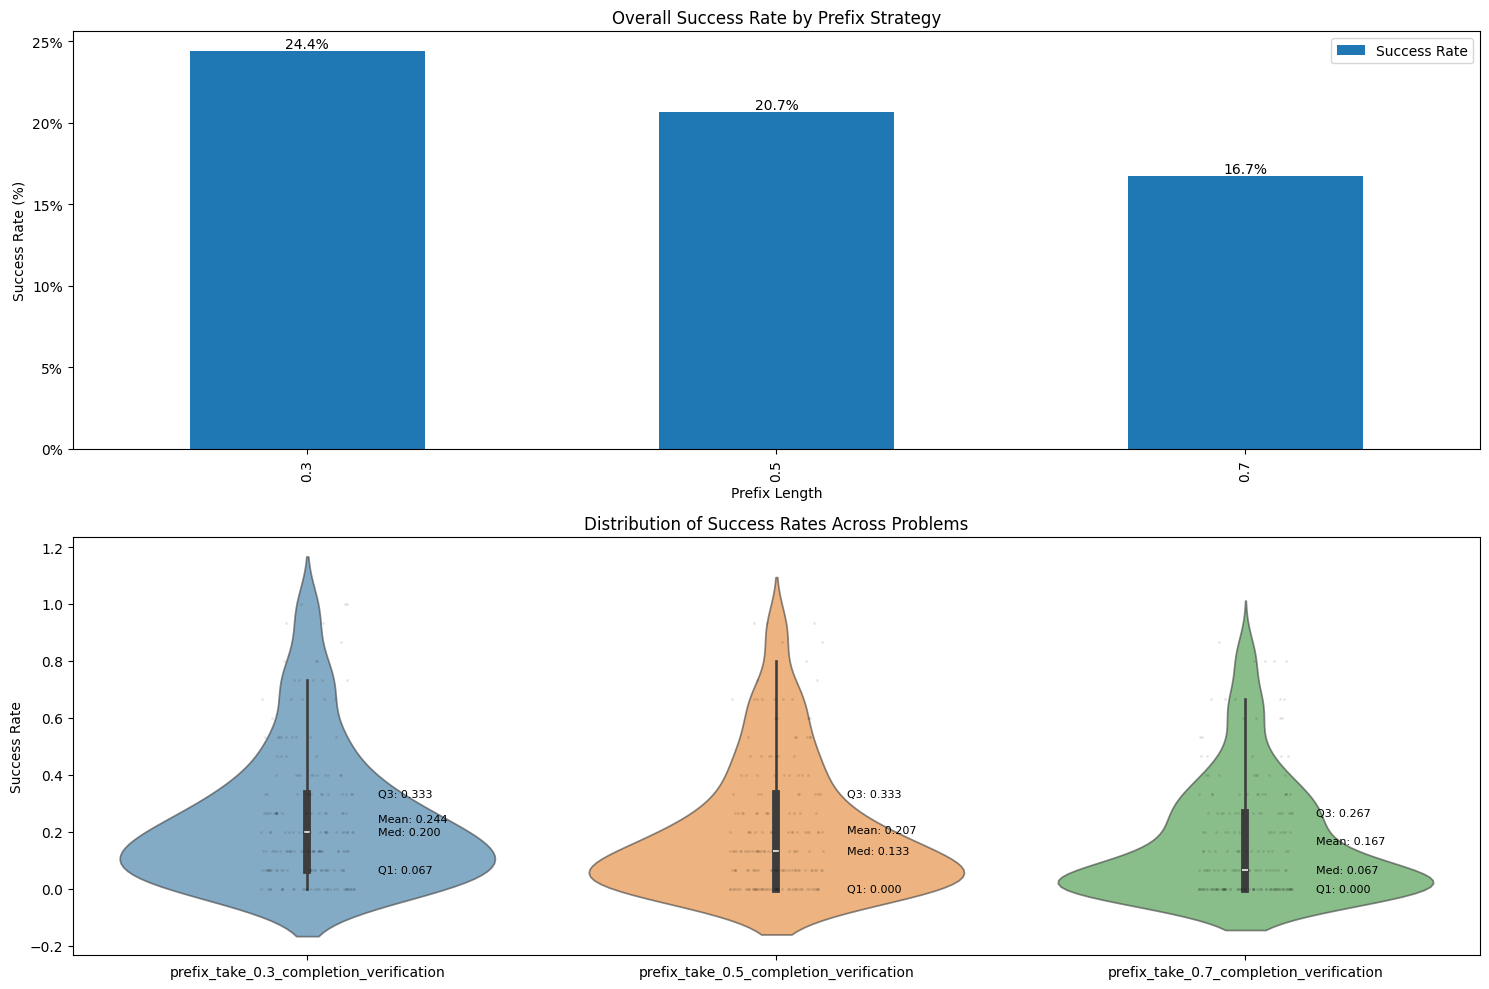


Overall Success Rates:
     Success Rate
0.3      0.243979
0.5      0.206632
0.7      0.167190

Per-Strategy Statistics across Problems:
       prefix_take_0.3_completion_verification  \
count                               191.000000   
mean                                  0.243979   
std                                   0.238459   
min                                   0.000000   
25%                                   0.066667   
50%                                   0.200000   
75%                                   0.333333   
max                                   1.000000   

       prefix_take_0.5_completion_verification  \
count                               191.000000   
mean                                  0.206632   
std                                   0.230083   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.133333   
75%                                   0.333333   
max        

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(15, 10))
gs = plt.GridSpec(2, 1, figure=fig)

# 1. Overall Success Rates by Strategy
ax1 = fig.add_subplot(gs[0, 0])
strategy_success = pd.DataFrame({
    '0.3': combined_df['prefix_take_0.3_completion_verification'].mean(),
    '0.5': combined_df['prefix_take_0.5_completion_verification'].mean(),
    '0.7': combined_df['prefix_take_0.7_completion_verification'].mean()
}, index=['Success Rate']).T

strategy_success.plot(kind='bar', ax=ax1)
# Add value labels on top of bars as percentages
for i, v in enumerate(strategy_success['Success Rate']):
    ax1.text(i, v, f'{v*100:.1f}%', ha='center', va='bottom')
ax1.set_title('Overall Success Rate by Prefix Strategy')
ax1.set_ylabel('Success Rate (%)')
ax1.set_xlabel('Prefix Length')
# Convert y-axis to percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

# 2. Per-Problem Success Distribution
ax2 = fig.add_subplot(gs[1, 0])
problem_success = combined_df.groupby('row_id').agg({
    'prefix_take_0.3_completion_verification': 'mean',
    'prefix_take_0.5_completion_verification': 'mean',
    'prefix_take_0.7_completion_verification': 'mean'
})

# Create violin plot with individual points
sns.violinplot(data=problem_success, ax=ax2, alpha=0.6)
sns.stripplot(data=problem_success, ax=ax2, size=2, alpha=0.1, color='black')
ax2.set_title('Distribution of Success Rates Across Problems')
ax2.set_ylabel('Success Rate')

# Add text annotations for quartiles and mean
for i, col in enumerate(problem_success.columns):
    stats = problem_success[col].describe()
    # Add text for quartiles and mean
    y_pos = [stats['25%'], stats['50%'], stats['75%'], stats['mean']]
    labels = [f'Q1: {stats["25%"]:.3f}', f'Med: {stats["50%"]:.3f}', 
             f'Q3: {stats["75%"]:.3f}', f'Mean: {stats["mean"]:.3f}']
    for y, label in zip(y_pos, labels):
        ax2.text(i + 0.15, y, label, ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nOverall Success Rates:")
print(strategy_success)

print("\nPer-Strategy Statistics across Problems:")
print(problem_success.describe())

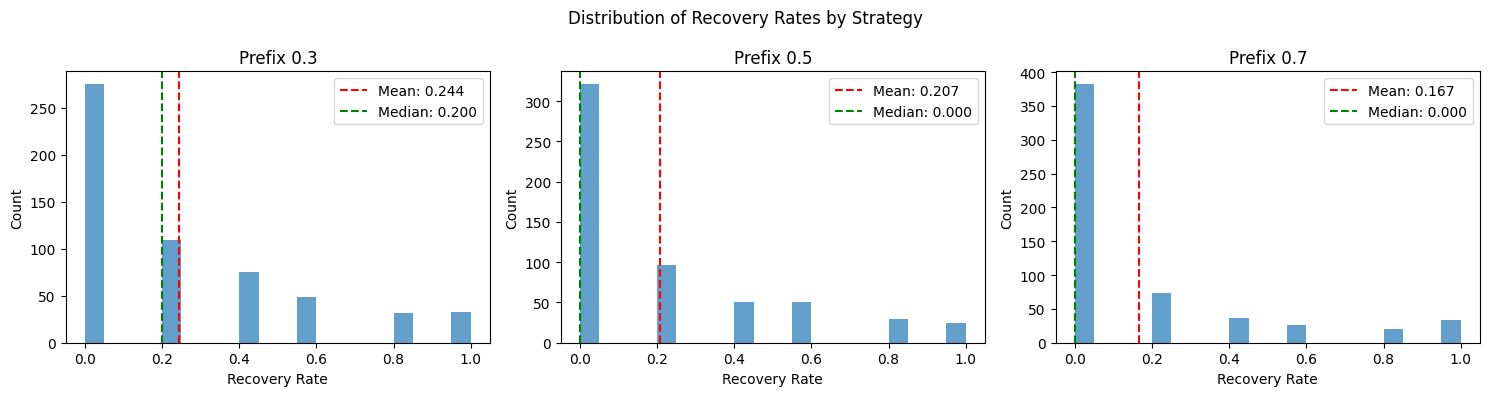


Recovery Rate Statistics by Strategy:

Prefix 0.3:
count    573.000000
mean       0.243979
std        0.305462
min        0.000000
25%        0.000000
50%        0.200000
75%        0.400000
max        1.000000
Name: prefix_take_0.3_completion_verification, dtype: float64

Prefix 0.5:
count    573.000000
mean       0.206632
std        0.294515
min        0.000000
25%        0.000000
50%        0.000000
75%        0.400000
max        1.000000
Name: prefix_take_0.5_completion_verification, dtype: float64

Prefix 0.7:
count    573.00000
mean       0.16719
std        0.29454
min        0.00000
25%        0.00000
50%        0.00000
75%        0.20000
max        1.00000
Name: prefix_take_0.7_completion_verification, dtype: float64


In [22]:
# Create figure for histograms of recovery rates by strategy
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Distribution of Recovery Rates by Strategy')

# Calculate recovery rates for each (row_id, solution_idx) pair
recovery_rates = {}
for prefix in ['0.3', '0.5', '0.7']:
    # Group by row_id and solution_idx and get mean verification rate
    rates = combined_df.groupby(['row_id', 'solution_idx'])[f'prefix_take_{prefix}_completion_verification'].mean()
    recovery_rates[prefix] = rates

# Plot histograms
for i, (prefix, rates) in enumerate(recovery_rates.items()):
    axes[i].hist(rates, bins=20, alpha=0.7)
    axes[i].set_title(f'Prefix {prefix}')
    axes[i].set_xlabel('Recovery Rate')
    axes[i].set_ylabel('Count')
    
    # Add mean and median lines
    mean = rates.mean()
    median = rates.median()
    axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.3f}')
    axes[i].axvline(median, color='green', linestyle='--', label=f'Median: {median:.3f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nRecovery Rate Statistics by Strategy:")
for prefix, rates in recovery_rates.items():
    print(f"\nPrefix {prefix}:")
    print(rates.describe())


/tmp/ipykernel_1018085/3085237781.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_success = combined_df.groupby(problem_sizes_binned).agg({


Text(0, 0.5, 'Success Rate')

<Figure size 1200x600 with 0 Axes>

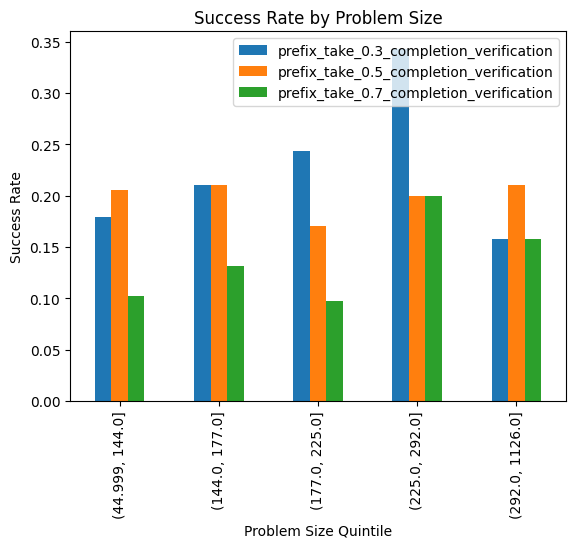

In [25]:
# Assuming problem length might be relevant
combined_df['problem_length'] = combined_df['problem'].str.len()
problem_sizes = combined_df.groupby('row_id')['problem_length'].first()

# Create size bins
problem_sizes_binned = pd.qcut(problem_sizes, q=5)

# Average success rate by problem size bin
size_success = combined_df.groupby(problem_sizes_binned).agg({
    'prefix_take_0.3_completion_verification': 'mean',
    'prefix_take_0.5_completion_verification': 'mean',
    'prefix_take_0.7_completion_verification': 'mean'
})

plt.figure(figsize=(12, 6))
size_success.plot(kind='bar')
plt.title('Success Rate by Problem Size')
plt.xlabel('Problem Size Quintile')
plt.ylabel('Success Rate')

Text(0, 0.5, 'Success Rate')

<Figure size 800x600 with 0 Axes>

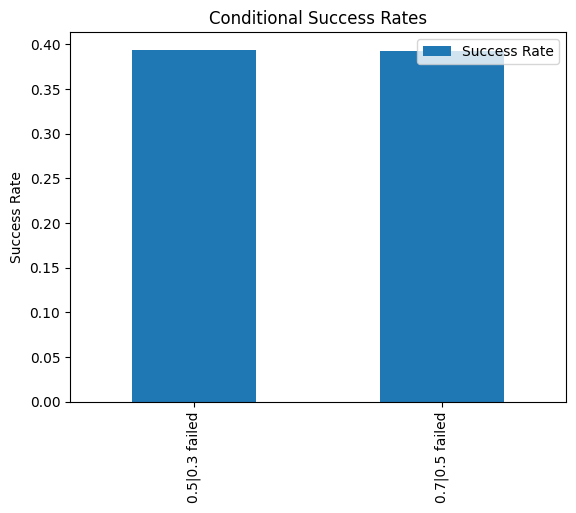

In [26]:
# Given that 0.3 failed, what's the success rate of 0.5?
# Given that 0.5 failed, what's the success rate of 0.7?
conditional_success = pd.DataFrame({
    '0.5|0.3 failed': len(problem_success[
        (problem_success['prefix_take_0.3_completion_verification'] == 0) & 
        (problem_success['prefix_take_0.5_completion_verification'] > 0)
    ]) / len(problem_success[problem_success['prefix_take_0.3_completion_verification'] == 0]),
    '0.7|0.5 failed': len(problem_success[
        (problem_success['prefix_take_0.5_completion_verification'] == 0) & 
        (problem_success['prefix_take_0.7_completion_verification'] > 0)
    ]) / len(problem_success[problem_success['prefix_take_0.5_completion_verification'] == 0])
}, index=['Success Rate'])

plt.figure(figsize=(8, 6))
conditional_success.T.plot(kind='bar')
plt.title('Conditional Success Rates')
plt.ylabel('Success Rate')

Text(0, 0.5, 'Average Variance')

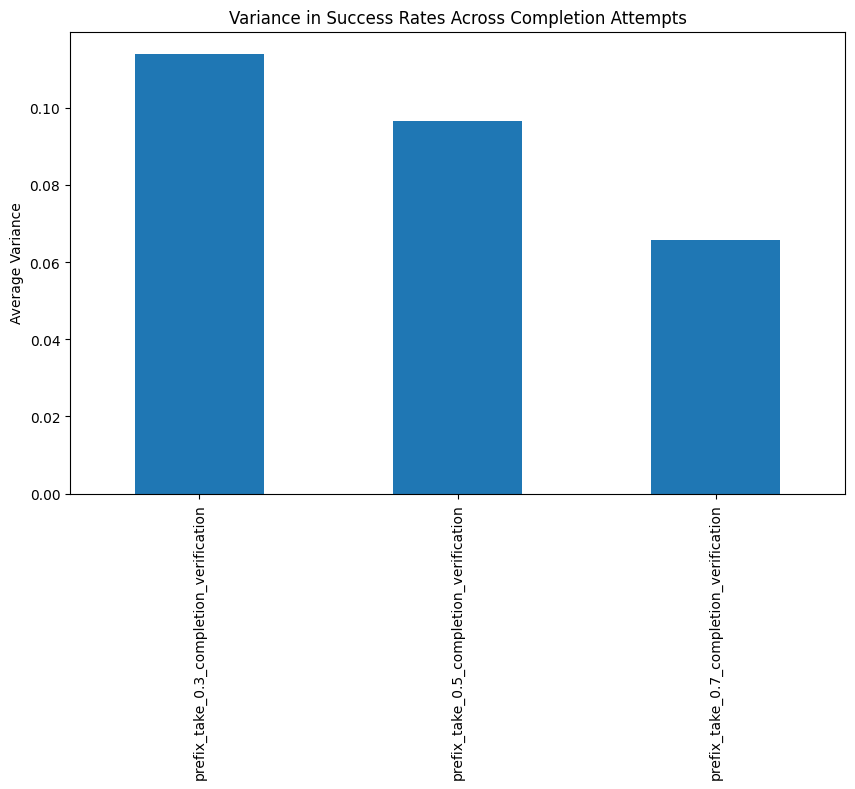

In [27]:
# For each (row_id, solution_idx), calculate variance in success across completions
stability_analysis = combined_df.groupby(['row_id', 'solution_idx']).agg({
    'prefix_take_0.3_completion_verification': 'var',
    'prefix_take_0.5_completion_verification': 'var',
    'prefix_take_0.7_completion_verification': 'var'
}).mean()

plt.figure(figsize=(10, 6))
stability_analysis.plot(kind='bar')
plt.title('Variance in Success Rates Across Completion Attempts')
plt.ylabel('Average Variance')